# Plant Seedling Classification among 12 species
#### The Plant Seedlings Dataset contains images of unique plants belonging to 12 species at several growth stages. It comprises annotated RGB images with a physical resolution of roughly 10 pixels per mm. The database have been recorded at Aarhus University Flakkebjerg Research station in a collaboration between University of Southern Denmark and Aarhus University.

### This trained model has the Validation Accuracy of 86%.

# Importing all the required packages:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import cv2
# set the matplotlib backend so figures can be saved in the background
import matplotlib .pyplot as plt
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras import backend as K
import random
import os

# Any results you write to the current directory are saved as output.

['nonsegmentedv2']


Using TensorFlow backend.


# Defining the Model Architecture with minute changes to SmallVGGNet layers:

In [2]:
# referred https://www.kaggle.com/justdvnsh/v2-plant-seedling-classification 

class SmallVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (width, height, 3)))
        model.add(Conv2D(32, (3,3), activation = 'relu'))
        model.add(Conv2D(32, (3,3), activation = 'relu'))
        model.add(MaxPooling2D(pool_size = (2,2))) 
        model.add(Dropout(0.3))

        model.add(Conv2D(64, (3,3), activation ='relu'))
        model.add(Conv2D(64, (3,3), activation ='relu'))
        model.add(Conv2D(64, (3,3), activation ='relu'))
        model.add(MaxPooling2D(pool_size = (2,2)))
        model.add(Dropout(0.3))

        model.add(Conv2D(128, (3,3), activation ='relu'))
        model.add(Conv2D(128, (3,3), activation ='relu'))
        model.add(Conv2D(128, (3,3), activation ='relu'))
        model.add(MaxPooling2D(pool_size = (2,2)))
        model.add(Dropout(0.3))

        
        model.add(Dense(256, activation = "relu"))
        model.add(Flatten())
        model.add(Dropout(0.3))
        model.add(Dense(12, activation = "softmax"))
       
    
        # return the constructed network architecture
        return model

# All the Images and their respective Labels are being saved into 2 separate arrays:

In [3]:
data = []
labels = []

for path, _, files in os.walk('../input/nonsegmentedv2'):
    imagesPaths =  sorted([image for image in files])
    #print(imagesPaths)
    for imagePath in imagesPaths:
        image = cv2.imread('../input/nonsegmentedv2/'+ path.split('/')[3] + '/' + imagePath)
        image = cv2.resize(image, (96,96))
        data.append(image)
        labels.append(path.split('/')[3])
        


### Converting arrays into Numpy arrays : 

In [4]:
data = np.array(data, dtype='float32')
labels = np.array(labels)

# Splitting of Train and Test data in 3:1 ratio : 

In [5]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

In [6]:
## Here We are just doing the one-hot encoding for the labels.
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

### Setting up the ImageDataGenerator :

In [7]:
# construct the image generator for data augmentation
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                        horizontal_flip=True, fill_mode="nearest")
 
"""
Image augmentation allows us to construct “additional” training data from our existing training data by randomly rotating, shifting, shearing, zooming, and flipping.

Data augmentation is often a critical step to:

1) Avoiding overfitting
2) Ensuring your model generalizes well
"""
    
# initialize our VGG-like Convolutional Neural Network
model = SmallVGGNet.build(width=96, height=96, depth=3,classes=len(lb.classes_))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Training the Model :

In [8]:
# initialize our initial learning rate, # of epochs to train for,
# and batch size

EPOCHS = 100
BS = 32
                                                     
# initialize the model and optimizer 
print("[INFO] training network...")

model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', 
              metrics=['accuracy'])

# train the network
h = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
                                validation_data=(testX, testY), 
                                steps_per_epoch=len(trainX) // BS,
                                epochs=EPOCHS, )

[INFO] training network...
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
129/129 [==============================] - 270s 2s/step - loss: 2.5027 - acc: 0.1238 - val_loss: 2.4354 - val_acc: 0.1430
Epoch 2/100
129/129 [==============================] - 264s 2s/step - loss: 2.3718 - acc: 0.1717 - val_loss: 2.0977 - val_acc: 0.2910
Epoch 3/100
129/129 [==============================] - 265s 2s/step - loss: 1.9340 - acc: 0.3154 - val_loss: 1.7350 - val_acc: 0.4195
Epoch 4/100
129/129 [==============================] - 265s 2s/step - loss: 1.7312 - acc: 0.3892 - val_loss: 1.4821 - val_acc: 0.4801
Epoch 5/100
129/129 [==============================] - 270s 2s/step - loss: 1.5668 - acc: 0.4609 - val_loss: 1.3303 - val_acc: 0.5379
Epoch 6/100
129/129 [==============================] - 274s 2s/step - loss: 1.4186 - acc: 0.5096 - val_loss: 1.2397 - val_acc: 0.5913
Epoch 7/100
129/129 [==============================] - 278s 2s/step - loss: 1.3020 - acc: 0.5500 - val_loss: 1.0960 - val

#### As we can see here , we got a 86% accuracy.


# Printing Classification Report and Plots for visualizing Train_loss, Val_loss, Train_acc, Val_acc :

[INFO] evaluating network...
                           precision    recall  f1-score   support

              Black-grass       0.57      0.75      0.65        88
                 Charlock       0.73      0.96      0.83       114
                 Cleavers       0.95      0.54      0.69        78
         Common Chickweed       0.94      0.96      0.95       173
             Common wheat       0.88      0.84      0.86        68
                  Fat Hen       0.96      0.97      0.96       155
         Loose Silky-bent       0.87      0.72      0.79       179
                    Maize       0.87      0.97      0.91        61
        Scentless Mayweed       0.97      0.87      0.92       149
         Shepherd’s Purse       0.85      0.95      0.90        56
Small-flowered Cranesbill       0.97      0.98      0.98       158
               Sugar beet       0.91      0.92      0.91       106

                micro avg       0.88      0.88      0.88      1385
                macro avg      

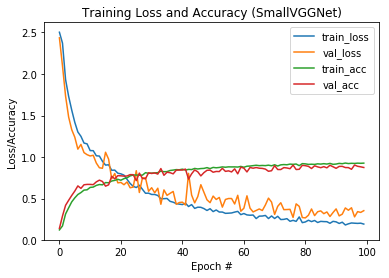

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=lb.classes_))
 
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.figure()
plt.plot(N, h.history["loss"], label="train_loss")
plt.plot(N, h.history["val_loss"], label="val_loss")
plt.plot(N, h.history["acc"], label="train_acc")
plt.plot(N, h.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Importing Packages required for Saving and Loading the Trained model : 

In [10]:
from keras.models import model_from_json
import json

# Saving the Model :

In [11]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("amodel.h5")
print("Saved model")

Saved model


In [12]:
!ls

__notebook__.ipynb  __output__.json  amodel.h5	model.json


# Loading the Model :

In [13]:
#loading saved model

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load weights into new model
loaded_model.load_weights("amodel.h5")
print("Loaded model")

Loaded model


Setting the Optimizer for the loaded model :

In [14]:
#predictiong using loaded model
loaded_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Predicting the Plant Specie of a Sample Input Image :

In [15]:
image = cv2.imread('../input/nonsegmentedv2/Fat Hen/100.png')
image = cv2.resize(image, (96,96))
np_image = np.array(image)
y = np.expand_dims(np_image, axis=0)
pred = loaded_model.predict(y)
print(pred)
pred.shape

[[4.84164957e-08 4.10328234e-08 1.09887325e-04 4.54986361e-11
  4.82851021e-07 9.99794424e-01 3.84440440e-12 1.62619278e-06
  4.00670652e-09 1.02733418e-06 2.25693339e-06 9.02973625e-05]]


(1, 12)

In [16]:
y_pred_binary = pred.argmax(axis=1)


if y_pred_binary==[0]:
    print("Black-Grass")
elif y_pred_binary==[1]:
    print("Charlock") 
elif y_pred_binary==[2]:
    print("Cleavers") 
elif y_pred_binary==[3]:
    print("Common Chickweed") 
elif y_pred_binary==[4]:
    print("Common Wheat") 
elif y_pred_binary==[5]:
    print("Fat Hen") 
elif y_pred_binary==[6]:
    print("Loose silky-bent") 
elif y_pred_binary==[7]:
    print("Maize") 
elif y_pred_binary==[8]:
    print("Scentless Mayweed") 
elif y_pred_binary==[9]:
    print("Shepherd's Purse") 
elif y_pred_binary==[10]:
    print("Small-flowered Cranesbill") 
elif y_pred_binary==[11]:
    print("Sugar beet") 


Fat Hen
